In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import methods
import pymaster as nmt
from importlib import reload
from tqdm import tqdm

/tmp/ipykernel_33909/3608914553.py:15: RuntimeWarning: invalid value encountered in true_divide
  input_cl /= ell_input*(ell_input+1)/2/np.pi


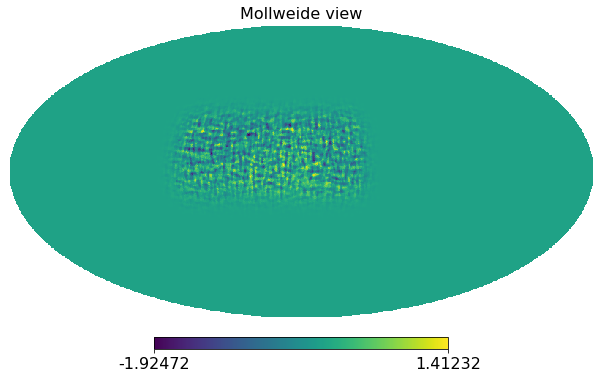

In [165]:
reload(methods)
ell_input, TT, TE, EE, BB, PP = np.loadtxt('cl.txt', unpack=True)

nside = 128
lmax = 3*nside-1
npix = 12*nside**2
sigmab = hp.nside2resol(nside)
fwhm = (8*np.log(2))**0.5 * sigmab
pixels = methods.create_pixels()
# bl = methods.get_bl(nside)
b = nmt.NmtBin.from_nside_linear(nside, 16)
ells = b.get_effective_ells()

input_cl = np.array([TT, EE, BB, TE])
input_cl /= ell_input*(ell_input+1)/2/np.pi 
for c in input_cl: c[0] = 0 
input_cl = input_cl[:,:lmax+1]
# ell_input = ell_input[:lmax+1]
    
input_cl = np.array([np.zeros(lmax+1), input_cl[1], np.zeros(lmax+1), np.zeros(lmax+1)]) #EE only
# input_cl = np.array([np.zeros(lmax+1), np.zeros(lmax+1), input_cl[2], np.zeros(lmax+1)]) #lensed r=0.1

input_map = hp.synfast(input_cl, nside, sigma=sigmab, new=True)

mask = np.zeros(npix)
mask[pixels[0]] = 1
mask_apo = nmt.mask_apodization(mask, 5, apotype="Smooth") 
mll = methods.get_mll(mask_apo, nside)
hp.mollview(mask_apo * input_map[1])

In [116]:
# reload(methods)
# flat_cl = np.ones(lmax+1)
# pcl = methods.sim_pcl(flat_cl, pixels, n_sims=32, n_obs=1, map_seed_start=1000)
# fl = methods.get_fl(flat_cl, pcl, bl, mll, niter=3)
# fl = np.load('fl.npy')

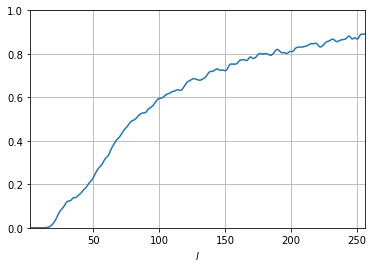

In [8]:
plt.plot(fl)
plt.ylim([0, 1])
plt.xlim([2, 2*nside])
plt.xlabel('$l$')
plt.grid()

In [9]:
# reload(methods)
# pcl4 = methods.sim_pcl(input_cl, pixels, n_sims=32, n_obs=1, map_seed_start=2000)
# leakage = pcl4[2] 
# plt.plot(leakage)

In [10]:
# reload(methods)
# mean, std = run_sim(nside, mask, b, fl=fl, leakage=None, pure_b=False, nsims=10)
# mean_p, std_p = run_sim(nside, mask, b, fl=fl, leakage=None, pure_b=True, nsims=10)
# mean_r, std_r = run_sim(nside, mask, b, fl=None, pure_b=True, nsims=10, replace=True)
# mean_c, std_c = run_sim(nside, mask, b, fl=None, pure_b=True, nsims=10, combine=True)

In [11]:
# mean, std = np.load('pcl.npy')
mean_p, std_p = np.load('pure.npy')
mean_c1, std_c1 = np.load('combine_1p0.npy')
mean_c2, std_c2 = np.load('combine_1p5.npy')
# mean_c3, std_c3 = np.load('combine_2p0.npy')
mean_f1, std_f1 = np.load('full_1p0.npy')
mean_f2, std_f2 = np.load('full_1p5.npy')
# mean_c3, std_c3 = np.load('combine_2p0.npy')

In [162]:
prefactor = ells*(ells+1)/2/np.pi

for a in (mean_p,std_p,mean_c1,std_c1,mean_c2,std_c2,mean_f1,std_f1,mean_f2,std_f2):
    a*= prefactor

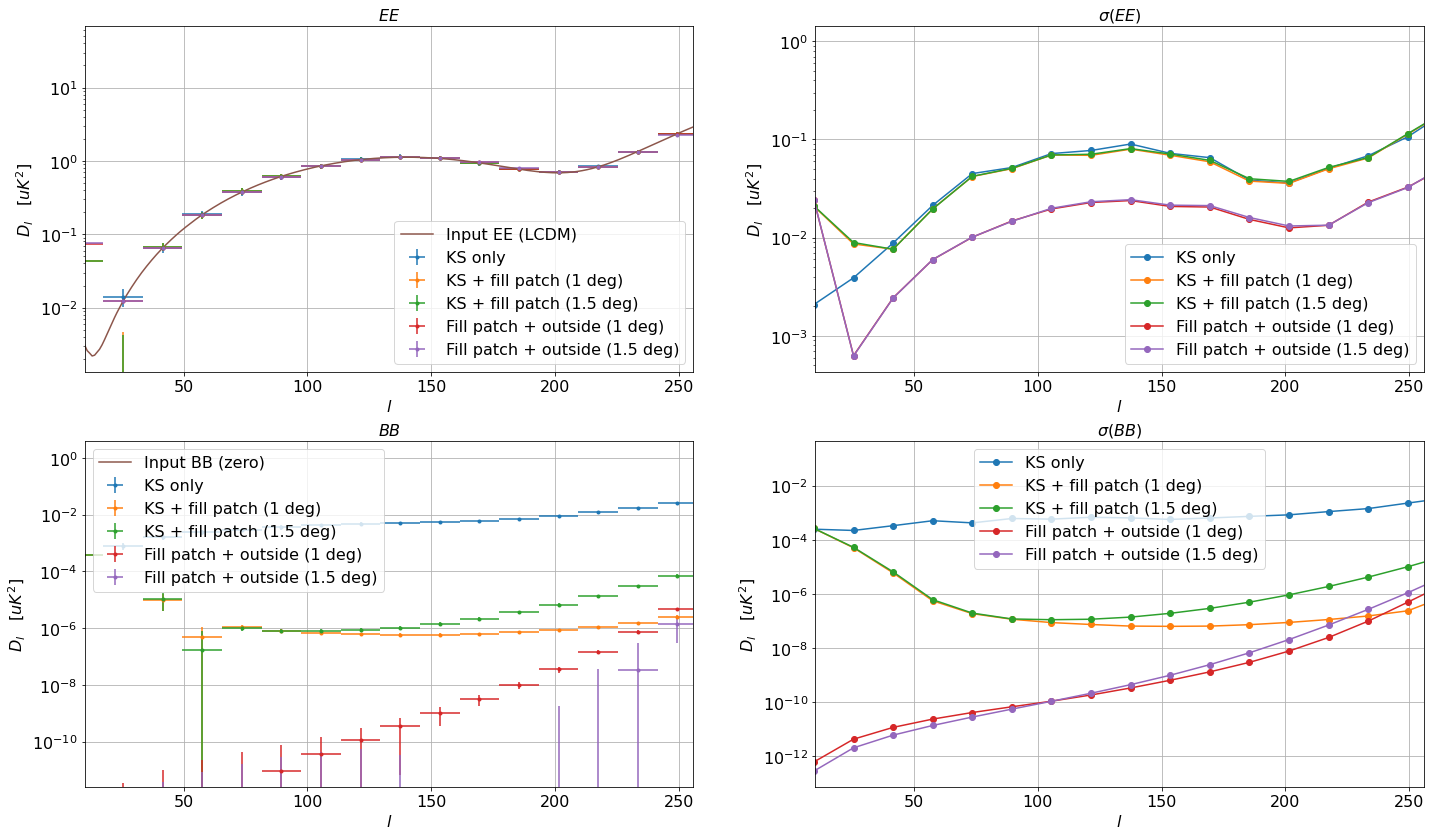

In [167]:
font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)

label_KS = 'KS only'
label_KS_patch_1 = 'KS + fill patch (1 deg)'
label_KS_patch_2 = 'KS + fill patch (1.5 deg)'
label_fill_both_1='Fill patch + outside (1 deg)'
label_fill_both_2='Fill patch + outside (1.5 deg)'

bin_width=np.median(np.diff(ells))/2
fig, axes = plt.subplots(2,2, figsize=(24, 14))

axes[0][0].set_title('$EE$')
# axes[0][0].errorbar(ells, mean[0], yerr=std[0], xerr=bin_width, fmt='.', label='pseudo-Cl')
axes[0][0].errorbar(ells, mean_p[0], yerr=std_p[0], xerr=bin_width, fmt='.', label=label_KS)
# axes[0][0].errorbar(ells, mean_r[0], yerr=std_r[0], xerr=bin_width, fmt='.', label='replace')
axes[0][0].errorbar(ells, mean_c1[0], yerr=std_c1[0], xerr=bin_width, fmt='.', label=label_KS_patch_1)
axes[0][0].errorbar(ells, mean_c2[0], yerr=std_c2[0], xerr=bin_width, fmt='.', label=label_KS_patch_2)
# axes[0][0].errorbar(ells, mean_c3[0], yerr=std_c3[0], xerr=bin_width, fmt='.', label='combine 2 deg')
axes[0][0].errorbar(ells, mean_f1[0], yerr=std_f1[0], xerr=bin_width, fmt='.', label=label_fill_both_1)
axes[0][0].errorbar(ells, mean_f2[0], yerr=std_f2[0], xerr=bin_width, fmt='.', label=label_fill_both_2)

axes[0][0].plot(ell_input, EE, label='Input EE (LCDM)')
axes[0][0].semilogy()
# axes[0][0].set_ylim([4e-5, 1e-3])

axes[0][1].set_title('$\sigma(EE)$')
# axes[0][1].plot(ells, std[0], label='pseudo-Cl', marker='o')
axes[0][1].plot(ells, std_p[0], label=label_KS, marker='o')
# axes[0][1].plot(ells, std_r[0], label='replace',marker='o')
axes[0][1].plot(ells, std_c1[0], label=label_KS_patch_1,marker='o')
axes[0][1].plot(ells, std_c2[0], label=label_KS_patch_2,marker='o')
# axes[0][1].plot(ells, std_c3[0], label='combine 2 deg',marker='o')
axes[0][1].plot(ells, std_f1[0], label=label_fill_both_1,marker='o')
axes[0][1].plot(ells, std_f2[0], label=label_fill_both_2,marker='o')

# axes[0][1].set_ylim([1e-10, 1e-2])
axes[0][1].semilogy()

axes[1][0].set_title('$BB$')
# axes[1][0].errorbar(ells, mean[3], std[3], bin_width, fmt='.', label='pseudo-Cl')
axes[1][0].errorbar(ells, mean_p[3], std_p[3], bin_width, fmt='.', label=label_KS)
# axes[1][0].errorbar(ells, mean_r[3], std_r[3], bin_width, fmt='.', label='replace')
axes[1][0].errorbar(ells, mean_c1[3], std_c1[3], bin_width, fmt='.', label=label_KS_patch_1)
axes[1][0].errorbar(ells, mean_c2[3], std_c2[3], bin_width, fmt='.', label=label_KS_patch_2)
# axes[1][0].errorbar(ells, mean_c3[3], std_c3[3], bin_width, fmt='.', label='combine 2 deg')
axes[1][0].errorbar(ells, mean_f1[3], std_f1[3], bin_width, fmt='.', label=label_fill_both_1)
axes[1][0].errorbar(ells, mean_f2[3], std_f2[3], bin_width, fmt='.', label=label_fill_both_2)

axes[1][0].plot(ell_input, np.zeros_like(ell_input), label='Input BB (zero)')
# axes[1][0].set_ylim([1e-10, 1e-2])
axes[1][0].semilogy()


axes[1][1].set_title('$\sigma(BB)$')
# axes[1][1].plot(ells, std[3], label='pseudo-Cl', marker='o')
axes[1][1].plot(ells, std_p[3], label=label_KS, marker='o')
# axes[1][1].plot(ells, std_r[3], label='replace',marker='o')
axes[1][1].plot(ells, std_c1[3], label=label_KS_patch_1,marker='o')
axes[1][1].plot(ells, std_c2[3], label=label_KS_patch_2,marker='o')
# axes[1][1].plot(ells, std_c3[3], label='combine 2 deg',marker='o')
axes[1][1].plot(ells, std_f1[3], label=label_fill_both_1,marker='o')
axes[1][1].plot(ells, std_f2[3], label=label_fill_both_2,marker='o')

# axes[1][1].set_ylim([1e-12, 1e-3])
axes[1][1].semilogy()

for ax in axes.flatten():
    ax.set_xlabel('$l$')
    ax.legend()
    ax.grid()  
    ax.set_xlim([10,2*nside])
    ax.set_ylabel('$D_{l} \hspace{1} [uK^{2}]$')